
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [95]:

import numpy as np
import matplotlib.pyplot as plt


In [96]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def __init__(self):
        #defining mean and var attributes
        self.mean = None
        self.var = None

    def fit(self, X):
        # Calculating mean of X along each column. If dim(X) = m x n, returns an array of n means
        self.mean = np.mean(X, axis=0)
        
        # Calculating variance of X along each column. If dim(X) = m x n, returns an array of n variances
        self.var = np.std(X, axis=0)
    
    def transform(self, X):
        # If all the values in self.var are non-zero
        # Standardizing the values(x) using z = (x - self.mean) / self.var
        if (self.var.all()):
            Z = (X - self.mean) / (self.var)

        # If X.var has one or more non-zero values
        # 1e-8 has been added to x.var to prevent a 'division by zero' error when x.var = 0 for any column
        else:
            Z = (X - self.mean) / (self.var + 1e-8)
        
        return Z
    
    def fit_transform(self, X):
        #Calulating mean and variance
        self.fit(X)

        #Returning the standardized data
        return self.transform(X)


In [97]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        # m = no. of data points, n = no. of features in each datapoint
        m, n = X.shape

        # Initializing weights and bias as 0
        self.weights = np.zeros(n)
        self.bias = 0

        # Training i.e. updating weights and bias for self.epochs iterations
        for i in range(self.epochs):
            # Forward Pass: y_pred = Xw + b
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute Loss, L = (MSE term + L2 term)
            # MSE term
            mse = np.sum((y_pred - y) ** 2) / (2*m)

            # L2 term
            l2 = self.l2_lambda * np.sum(self.weights ** 2) / (2 * n)
            
            total_loss = mse + l2
            self.losses.append(total_loss)

            # Compute Gradients
            error = y_pred - y
            
            # Gradient for weights: dL/dw
            dw = (1 / n) * np.dot(X.T, error) + (self.l2_lambda / n) * self.weights
            
            # Gradient for bias: dL/db
            db = (1 / n) * np.sum(error)

            # Update Parameters (Gradient Descent)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Return predictions made by the tuned model i.e. weights and bias
        return np.dot(X, self.weights) + self.bias




# Implementation of L1(Lasso) regression
class LassoRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l1_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l1_lambda = l1_lambda
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        # m = no. of data points, n = no. of features in each datapoint
        m, n = X.shape

        # Initializing weights and bias as 0
        self.weights = np.zeros(n)
        self.bias = 0

        # Training i.e. updating weights and bias for self.epochs iterations
        for i in range(self.epochs):
            # Forward Pass: y_pred = Xw + b
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute Loss, L = (MSE term + L1 term)
            # MSE term
            mse = np.sum((y_pred - y) ** 2) / (2*m)

            # L1 term
            l1 = self.l1_lambda * np.sum(self.weights) / (2 * n)
            
            total_loss = mse + l1
            self.losses.append(total_loss)

            # Compute Gradients
            error = y_pred - y
            
            # Gradient of L1 Regularization is (lambda/m) * sign(w)
            l1_derivative = (self.l1_lambda / n) * np.sign(self.weights)

            # Gradient for weights: dL/dw
            dw = ((1 / n) * np.dot(X.T, error) + (self.l1_lambda / n) * self.weights) + l1_derivative
            
            # Gradient for bias: dL/db
            db = (1 / n) * np.sum(error)

            # Update Parameters (Gradient Descent)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Return predictions made by the tuned model i.e. weights and bias
        return np.dot(X, self.weights) + self.bias

Training using L2 Regression


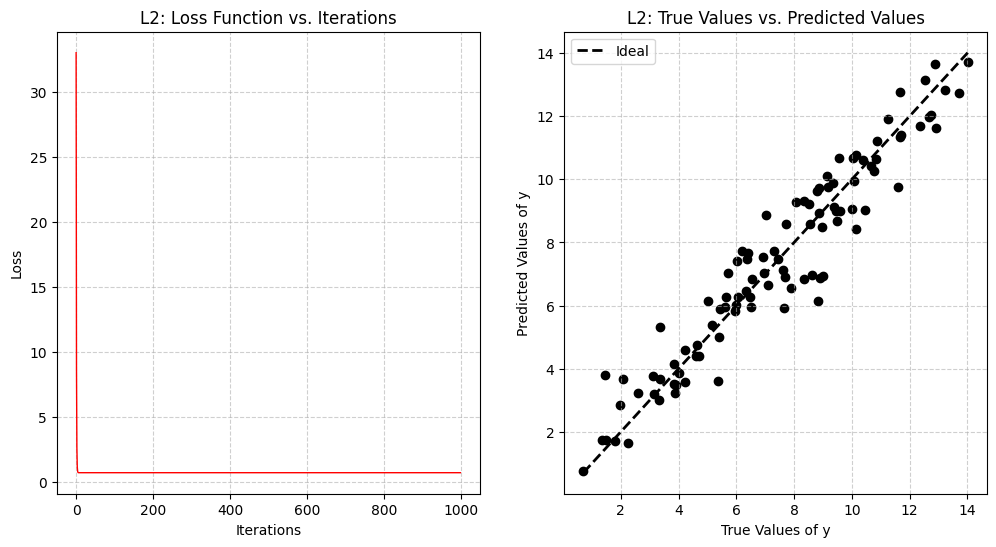

Training using L1 Regression


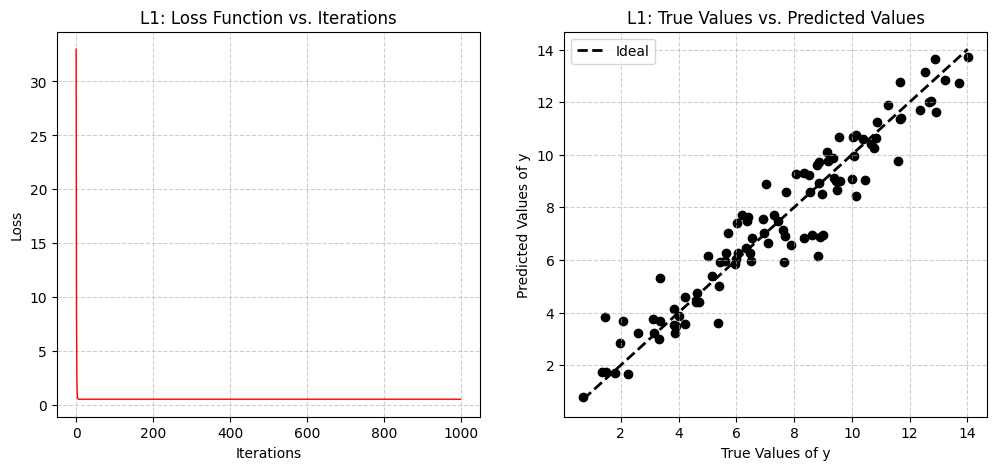

In [98]:
# Creating X, y for training 
# Generating 100 random 2D points
X_data = 10 * np.random.rand(100, 2)
    
# Choose some coefficients (weights) and bias
true_weights = np.random.rand(2)
true_bias = 0.1 * np.random.rand()

# y = Xw + b
y_data = np.dot(X_data, true_weights) + true_bias

# Add noise to y
y_data += np.random.normal(0, 1, size = 100)




# Scaling Data
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_data)
X_test_scaled = scaler.transform(X_data)

# Training model using a small learning rate(lr) for stability
model_l2 = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_l2.fit(X_train_scaled, y_data)

model_l1 = LassoRegressionManual(lr=0.01, epochs=1000, l1_lambda=0.1)
model_l1.fit(X_train_scaled, y_data)

# Getting output predictions based on trained model
y_pred_l2 = model_l2.predict(X_test_scaled)
y_pred_l1 = model_l1.predict(X_test_scaled)




# Plotting
print("Training using L2 Regression")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_l2.losses, color='r', linewidth = 1)
plt.title('L2: Loss Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.scatter(y_data, y_pred_l2, alpha=1, color='k')
min_val = min(np.min(y_data), np.min(y_pred_l2))
max_val = max(np.max(y_data), np.max(y_pred_l2))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal')
plt.title('L2: True Values vs. Predicted Values')
plt.xlabel('True Values of y')
plt.ylabel('Predicted Values of y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("Training using L1 Regression")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_l1.losses, color='r', linewidth = 1)
plt.title('L1: Loss Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.scatter(y_data, y_pred_l1, alpha=1, color='k')
min_val = min(np.min(y_data), np.min(y_pred_l1))
max_val = max(np.max(y_data), np.max(y_pred_l1))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal')

plt.title('L1: True Values vs. Predicted Values')
plt.xlabel('True Values of y')
plt.ylabel('Predicted Values of y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [99]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [110]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        # m = no. of data points, n = no. of features in each datapoint
        m, n = X.shape

        # Initializing weights and bias as 0
        self.weights = np.zeros(n)
        self.bias = 0

        # Training i.e. updating weights and bias for self.epochs iterations
        for i in range(self.epochs):
            # Forward Pass + Activation: y_pred = sigmoid(Xw + b)
            y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Compute Loss, L = (BCE term + L2 term)
            # BCE term
            bce = np.sum(np.dot(np.log(y_pred), y) + np.dot(np.log(1 - y_pred), 1 - y)) / (-m)

            # L2 term
            l2 = self.l2_lambda * np.sum(self.weights ** 2) / (2 * n)
            
            total_loss = bce + l2
            self.losses.append(total_loss)

            # Compute Gradients
            error = y_pred - y
            
            # Gradient for weights: dL/dw
            dw = (1 / n) * np.dot(X.T, error) + (self.l2_lambda / n) * self.weights
            
            # Gradient for bias: dL/db
            db = (1 / n) * np.sum(error)

            # Update Parameters (Gradient Descent)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        # Binary Classification based on predict_proba
        y_pred_cls = [1 if i > 0.5 else 0 for i in self.predict_proba(X)]
        return np.array(y_pred_cls)


Regularization strength: using lambda = 0.001


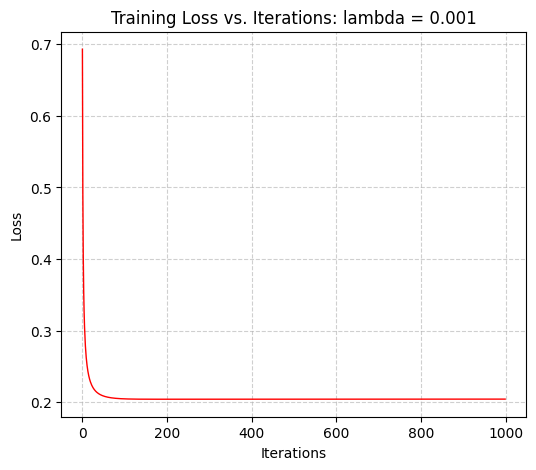

Accuracy on Test Set: 91.0 %


Regularization strength: using lambda = 0.01


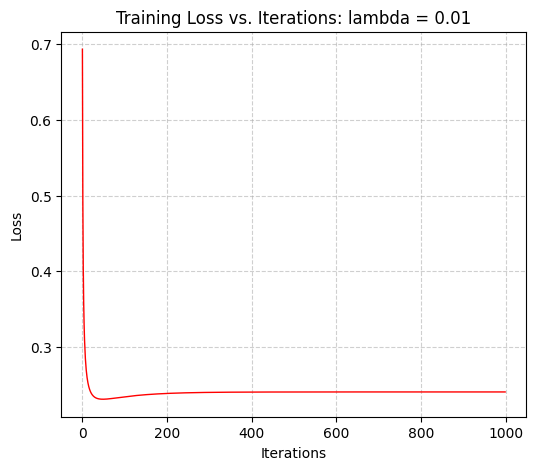

Accuracy on Test Set: 91.0 %




In [ ]:
# Random 2D points: Centered at (-2, -2), belong to Class 0
X0 = (2*np.random.randn(100, 2)) - 2
y0 = np.zeros(100)

# Random 2D points: Centered at (2, 2), belong to Class 1
X1 = (2*np.random.randn(100, 2)) + 2
y1 = np.ones(100)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Shuffling data
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

# X,y can now be used for training a Binary Classification model

# Scaling Data
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X)

# Training model using a small learning rate(lr) and small l2_lambda for stability
model1 = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.001)
model1.fit(X_train_scaled, y)

model2 = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.01)
model2.fit(X_train_scaled, y)

# Getting output predictions based on trained model
y_pred1 = model1.predict(X_test_scaled)
y_pred2 = model2.predict(X_test_scaled)



# Plotting Loss for lambda = 0.001
print("Regularization strength: using lambda = 0.001")
plt.figure(figsize=(6, 5))
plt.plot(model1.losses, color='r', linewidth = 1)
plt.title('Training Loss vs. Iterations: lambda = 0.001')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Calucalating Accuracy
valid_pred = (y_pred1 == y) # 0 if incorrect, 1 if correct
accuracy = np.mean(valid_pred)
print("Accuracy on Test Set:", accuracy * 100, "%")
print("\n")



# Plotting Loss for lambda = 0.005
print("Regularization strength: using lambda = 0.01")
plt.figure(figsize=(6, 5))
plt.plot(model2.losses, color='r', linewidth = 1)
plt.title('Training Loss vs. Iterations: lambda = 0.01')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Calucalating Accuracy
valid_pred = (y_pred2 == y) # 0 if incorrect, 1 if correct
accuracy = np.mean(valid_pred)
print("Accuracy on Test Set:", accuracy * 100, "%")
print("\n")




## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [102]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape
    data = M.flatten()
    
    # Picking k random indices from the data to serve as initial centroids
    random_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[random_indices].astype(float)
    
    # label stores the cluster id of each element in data
    labels = np.zeros(len(data), dtype=int)
    
    for iter in range(max_iters):
        # Calculating distance from every point to every centroid using broadcasting. Final matrix shape = (n*m) X  k
        distances = np.abs(data[:, np.newaxis] - centroids[np.newaxis, :])
        
        # Assigning each point to the cluster of the closest centroid
        new_labels = np.argmin(distances, axis=1)
        
        # Checking for convergence
        if (labels == new_labels).all():
            break
        
        labels = new_labels
        
        # Updating Centroids
        new_centroids = np.zeros(k)
        for i in range(k):
            # Getting all data points assigned to cluster i
            cluster_points = data[labels == i]
            
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points)
            else:
                new_centroids[i] = centroids[i] 
        
        centroids = new_centroids
    
    # Reshaping labels to get the assignment table (n, m)
    assignment_table = labels.reshape(n, m)
    
    # Building the Cookbook
    cookbook = {i: [] for i in range(k)}
    
    # Efficiently finding indices for each cluster
    for i in range(k):
        coords = np.argwhere(assignment_table == i)
        cookbook[i] = list(tuple(c) for c in coords)
        
    return assignment_table, cookbook, centroids



# Example
# Generate random matrix (e.g., pixel values 0-255)
M = np.random.randint(0, 255, size=(15, 10))
k = 3
assignments, book, centers = kmeans_matrix(M, k)


print("Original Matrix:")
print(M)
print("\n")

print("Final Centroids:")
print(np.round(centers, 2))
print("\n")

print("Assignment Table (Cluster IDs):")
print(assignments)
print("\n")

print("Cookbook (Positions for Cluster 0):")
print(book[0])


Original Matrix:
[[239 114  25 150  42  76 155 136  19 183]
 [210 239  38 178  11 206 222 182 205  10]
 [153  41 154  10  37  97 170  18 191 133]
 [173 115 229 112 169 219  64  98 231  71]
 [186  51 117 174 119   6  10 102  60  67]
 [152 139 153 101 109 139 170  50 116 164]
 [ 45  52  87 207 120  12  88 124 117  53]
 [184 115 117   3  74 223  48   6 109 121]
 [ 10  91 181 232 214 172  22 241  27 234]
 [110  56  25 152  53  28 210  96 163  13]
 [ 77  34  29  91  16 194 207 237 157 243]
 [ 92 172  78 109 247 216 178 101 105 250]
 [ 46 180  63 245 243 249 165  63  86 216]
 [233   6  21  80 209 240 168  73 137 184]
 [134 239 124  49 229 218  51 160   0 235]]


Final Centroids:
[207.24  35.83 117.54]


Assignment Table (Cluster IDs):
[[0 2 1 2 1 1 2 2 1 0]
 [0 0 1 0 1 0 0 0 0 1]
 [2 1 2 1 1 2 0 1 0 2]
 [0 2 0 2 0 0 1 2 0 1]
 [0 1 2 0 2 1 1 2 1 1]
 [2 2 2 2 2 2 0 1 2 0]
 [1 1 2 0 2 1 2 2 2 1]
 [0 2 2 1 1 0 1 1 2 2]
 [1 2 0 0 0 0 1 0 1 0]
 [2 1 1 2 1 1 0 2 0 1]
 [2 1 1 2 1 0 0 0 2 0]
 [2 0 2 


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
